<a href="https://colab.research.google.com/github/ChristianJJohnson/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd
pd.set_option('display.precision',10)

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [0]:
def findNulls(df):
  print(f"{df.isnull().sum()}\n")
  for col in df.columns:
    print(df[col].unique())

In [0]:
findNulls(cell_phones)

geo                  0
time                 0
cell_phones_total    0
dtype: int64

['abw' 'afg' 'ago' 'alb' 'and' 'are' 'arg' 'arm' 'asm' 'atg' 'aus' 'aut'
 'aze' 'bdi' 'bel' 'ben' 'bfa' 'bgd' 'bgr' 'bhr' 'bhs' 'bih' 'blr' 'blz'
 'bmu' 'bol' 'bra' 'brb' 'brn' 'btn' 'bwa' 'caf' 'can' 'che' 'chl' 'chn'
 'civ' 'cmr' 'cod' 'cog' 'col' 'com' 'cpv' 'cri' 'cub' 'cym' 'cyp' 'cze'
 'deu' 'dji' 'dma' 'dnk' 'dom' 'dza' 'ecu' 'egy' 'eri' 'esp' 'est' 'eth'
 'fin' 'fji' 'fra' 'fro' 'fsm' 'gab' 'gbr' 'geo' 'gha' 'gib' 'gin' 'gmb'
 'gnb' 'gnq' 'grc' 'grd' 'grl' 'gtm' 'gum' 'guy' 'hkg' 'hnd' 'hrv' 'hti'
 'hun' 'idn' 'ind' 'irl' 'irn' 'irq' 'isl' 'isr' 'ita' 'jam' 'jor' 'jpn'
 'kaz' 'ken' 'kgz' 'khm' 'kir' 'kna' 'kor' 'kos' 'kwt' 'lao' 'lbn' 'lbr'
 'lby' 'lca' 'lie' 'lka' 'lso' 'ltu' 'lux' 'lva' 'mac' 'mar' 'mco' 'mda'
 'mdg' 'mdv' 'mex' 'mhl' 'mkd' 'mli' 'mlt' 'mmr' 'mne' 'mng' 'mnp' 'moz'
 'mrt' 'mus' 'mwi' 'mys' 'nam' 'ncl' 'ner' 'nga' 'nic' 'nld' 'nld_curacao'
 'nor' 'npl' 'nru' 'nzl' 'omn' 'pak' 'p

In [0]:
findNulls(population)

geo                 0
time                0
population_total    0
dtype: int64

['afg' 'ago' 'alb' 'and' 'are' 'arg' 'arm' 'atg' 'aus' 'aut' 'aze' 'bdi'
 'bel' 'ben' 'bfa' 'bgd' 'bgr' 'bhr' 'bhs' 'bih' 'blr' 'blz' 'bol' 'bra'
 'brb' 'brn' 'btn' 'bwa' 'caf' 'can' 'che' 'chl' 'chn' 'civ' 'cmr' 'cod'
 'cog' 'col' 'com' 'cpv' 'cri' 'cub' 'cyp' 'cze' 'deu' 'dji' 'dma' 'dnk'
 'dom' 'dza' 'ecu' 'egy' 'eri' 'esp' 'est' 'eth' 'fin' 'fji' 'fra' 'fsm'
 'gab' 'gbr' 'geo' 'gha' 'gin' 'gmb' 'gnb' 'gnq' 'grc' 'grd' 'gtm' 'guy'
 'hkg' 'hnd' 'hos' 'hrv' 'hti' 'hun' 'idn' 'ind' 'irl' 'irn' 'irq' 'isl'
 'isr' 'ita' 'jam' 'jor' 'jpn' 'kaz' 'ken' 'kgz' 'khm' 'kir' 'kna' 'kor'
 'kwt' 'lao' 'lbn' 'lbr' 'lby' 'lca' 'lie' 'lka' 'lso' 'ltu' 'lux' 'lva'
 'mar' 'mco' 'mda' 'mdg' 'mdv' 'mex' 'mhl' 'mkd' 'mli' 'mlt' 'mmr' 'mne'
 'mng' 'moz' 'mrt' 'mus' 'mwi' 'mys' 'nam' 'ner' 'nga' 'nic' 'nld' 'nor'
 'npl' 'nru' 'nzl' 'omn' 'pak' 'pan' 'per' 'phl' 'plw' 'png' 'pol' 'prk'
 'prt' 'pry' 'pse' 'qat' 'rou' 'rus' 'rwa' '

In [0]:
findNulls(geo_country_codes)

geo        0
country    0
dtype: int64

['abkh' 'abw' 'afg' 'ago' 'aia' 'akr_a_dhe' 'ala' 'alb' 'and' 'ant' 'are'
 'arg' 'arm' 'asm' 'ata' 'atg' 'aus' 'aut' 'aze' 'bdi' 'bel' 'ben' 'bfa'
 'bgd' 'bgr' 'bhr' 'bhs' 'bih' 'blr' 'blz' 'bmu' 'bol' 'bouisl' 'bra'
 'brb' 'brn' 'btn' 'bwa' 'caf' 'can' 'cck' 'chanisl' 'che' 'cheslo' 'chl'
 'chn' 'civ' 'cmr' 'cod' 'cog' 'cok' 'col' 'com' 'cpv' 'cri' 'cub' 'cxr'
 'cym' 'cyp' 'cyp_nor' 'cze' 'deu' 'deu_east' 'deu_west' 'dji' 'dma' 'dnk'
 'dom' 'dza' 'ecu' 'egy' 'eri' 'eri_a_eth' 'esh' 'esp' 'est' 'eth' 'fin'
 'fji' 'flk' 'fra' 'fra_antarc' 'fra_clipperton' 'fro' 'fsm' 'gab' 'gbg'
 'gbm' 'gbr' 'geo' 'gha' 'gib' 'gin' 'glp' 'gmb' 'gnb' 'gnq' 'grc' 'grd'
 'grl' 'gtm' 'guf' 'gum' 'guy' 'heard_a_mcd' 'hkg' 'hnd' 'hos' 'hrv' 'hti'
 'hun' 'idn' 'ind' 'iot' 'irl' 'irn' 'irq' 'isl' 'isr' 'ita' 'jam' 'jey'
 'jor' 'jpn' 'kaz' 'ken' 'kgz' 'khm' 'kir' 'kna' 'kor' 'korea_union' 'kos'
 'kwt' 'lao' 'lbn' 'lbr' 'lby' 'lca' 'lie' 'lka' 'lso' 'ltu' 'lux' 'lva'
 'mac'

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


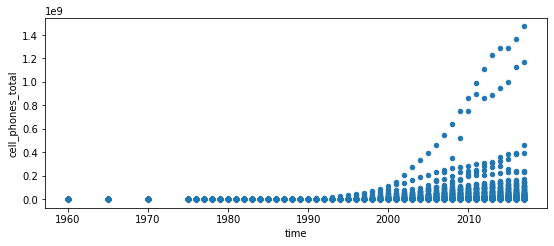

In [0]:
cell_phones.plot(kind='scatter', x='time', y='cell_phones_total', figsize=(9,3.5));

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
cell_population = pd.merge(cell_phones, population, on=['geo', 'time'], how='inner')

In [0]:
cell_population.shape

(8590, 4)

In [0]:
cell_population.sample(10)

,geo,time,cell_phones_total,population_total
2788,gbr,1988,560000.0,56862893
3779,isl,2017,410662.0,335025
3661,irn,1991,0.0,57375584
6843,sgp,2016,8460700.0,5622455
2699,fsm,1990,0.0,96331
1818,cri,1975,0.0,2097407
5422,moz,2012,8804986.0,25676606
4273,kor,1983,0.0,39752024
5784,nic,2007,2502281.0,5522106
5958,nru,1998,850.0,10046


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
geo_country_codes.head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [0]:
dPhone = pd.merge(geo_country_codes, cell_population, on='geo', how='inner')

In [0]:
dPhone.shape

(8590, 5)

In [0]:
dPhone = dPhone.sort_values(by=['country', 'time']).reset_index().drop(['index'], axis=1)

In [0]:
# make geo uppercase
dPhone['geo'] = dPhone['geo'].str.upper() 

In [0]:
dPhone.head(10)

,geo,country,time,cell_phones_total,population_total
0,AFG,Afghanistan,1960,0.0,8996351
1,AFG,Afghanistan,1965,0.0,9938414
2,AFG,Afghanistan,1970,0.0,11126123
3,AFG,Afghanistan,1975,0.0,12590286
4,AFG,Afghanistan,1976,0.0,12840299
5,AFG,Afghanistan,1977,0.0,13067538
6,AFG,Afghanistan,1978,0.0,13237734
7,AFG,Afghanistan,1979,0.0,13306695
8,AFG,Afghanistan,1980,0.0,13248370
9,AFG,Afghanistan,1981,0.0,13053954


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
dPhone['cell_phones_per_person'] = dPhone['cell_phones_total']/dPhone['population_total']

In [0]:
dPhone.loc[dPhone['country'] == 'United States']

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
8180,USA,United States,1960,0.0,186808228,0.0000000000
8181,USA,United States,1965,0.0,199815540,0.0000000000
8182,USA,United States,1970,0.0,209588150,0.0000000000
8183,USA,United States,1975,0.0,219205296,0.0000000000
8184,USA,United States,1976,0.0,221239215,0.0000000000
8185,USA,United States,1977,0.0,223324042,0.0000000000
8186,USA,United States,1978,0.0,225449657,0.0000000000
8187,USA,United States,1979,0.0,227599878,0.0000000000
8188,USA,United States,1980,0.0,229763052,0.0000000000
8189,USA,United States,1984,91600.0,238573861,0.0003839482


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
dPhone.describe(include = 'all')

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
count,8590,8590,8590.0000000000,8.5900000000e+03,8.5900000000e+03,8590.0000000000
unique,195,195,NaN,NaN,NaN,NaN
top,IDN,Guatemala,NaN,NaN,NaN,NaN
freq,46,46,NaN,NaN,NaN,NaN
mean,NaN,NaN,1994.1934807916,9.0049496429e+06,2.9838230582e+07,0.2796385558
std,NaN,NaN,14.2579746073,5.5734084872e+07,1.1612837747e+08,0.4542466562
min,NaN,NaN,1960.0000000000,0.0000000000e+00,4.4330000000e+03,0.0000000000
25%,NaN,NaN,1983.0000000000,0.0000000000e+00,1.4561480000e+06,0.0000000000
50%,NaN,NaN,1995.0000000000,6.2000000000e+03,5.7250625000e+06,0.0015636266
75%,NaN,NaN,2006.0000000000,1.6976520000e+06,1.8105812000e+07,0.4611491855


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
myresults = dPhone.loc[dPhone['time'] == 2017]

In [0]:
myresults = myresults.sort_values(by=['cell_phones_total'], ascending=False)
myresults.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1643,CHN,China,2017,1474097000.0,1409517397,1.0458168187
3516,IND,India,2017,1168902277.0,1339180127,0.8728491810
3562,IDN,Indonesia,2017,458923202.0,263991379,1.7384022302
8222,USA,United States,2017,395881000.0,324459463,1.2201246847
1094,BRA,Brazil,2017,236488548.0,209288278,1.1299655684


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [0]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
guest_ocu = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
guest_ocu

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578,0.0120481928,0.0662650602,0.0180722892
2000,0.7396449704,0.0828402367,0.1242603550,0.0532544379
2001,0.7261146497,0.0382165605,0.1974522293,0.0382165605
2002,0.6226415094,0.0691823899,0.2641509434,0.0440251572
2003,0.5602409639,0.1024096386,0.2469879518,0.0903614458
2004,0.3841463415,0.2256097561,0.2743902439,0.1158536585
2005,0.3703703704,0.1604938272,0.3333333333,0.1358024691
2006,0.3602484472,0.1925465839,0.2919254658,0.1552795031
2007,0.2553191489,0.1702127660,0.3333333333,0.2411347518


### Part 2 — Recreate this explanatory visualization:



**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

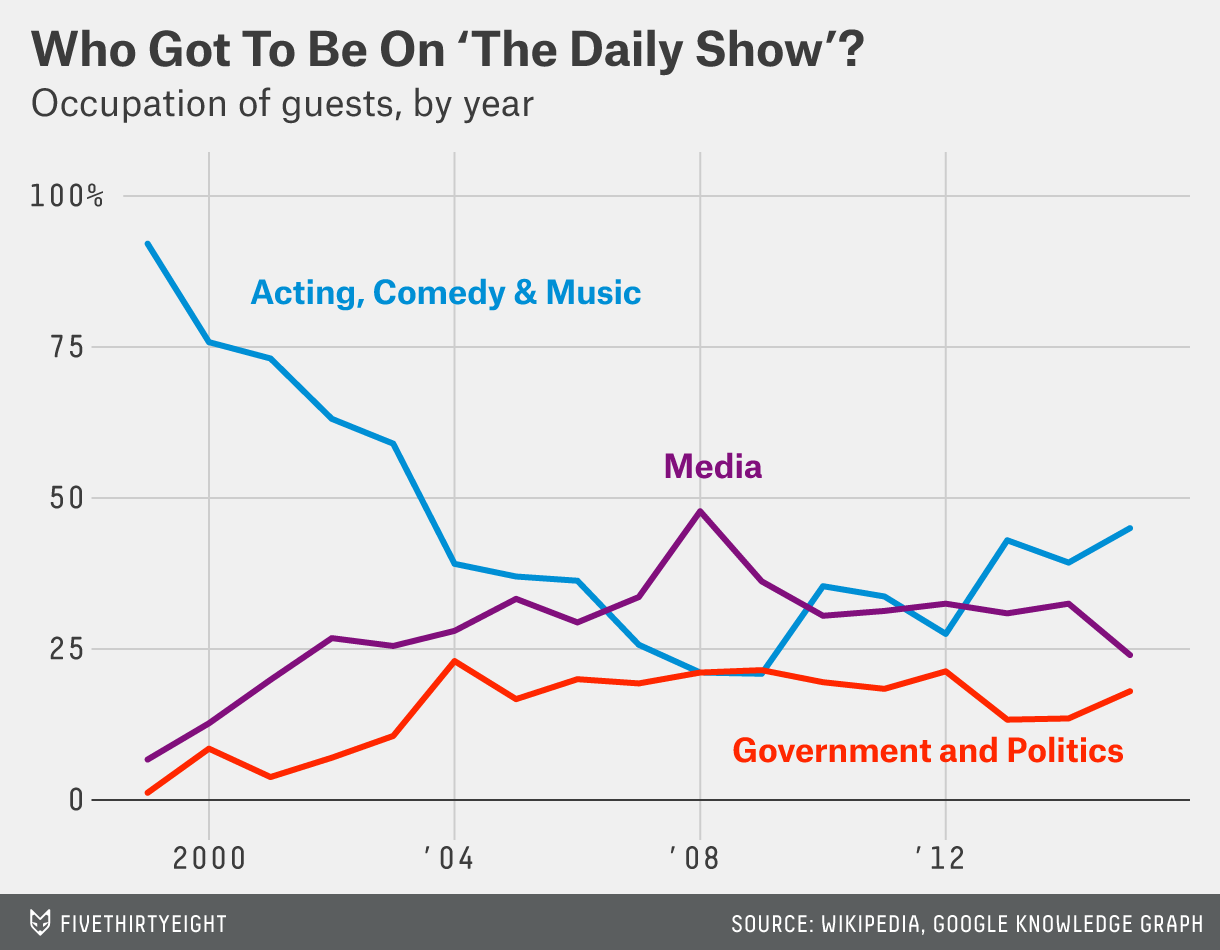

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [1]:
plt.style.use('bmh')

fig = plt.figure(figsize=(9, 6));
ax1 = fig.add_axes([.6,.6,.8,.8])
ax2 = fig.add_axes([.8,.8,.8,.8])
ax3 = fig.add_axes([.8,.8,.8,.8])

plt.title("Who Got To Be On 'The Daily Show'?", x=.350, y=.92,fontname="Times New Roman",fontweight="bold", fontsize=15.5)
plt.suptitle("Occupation of guests, by year", x=.995, y=1.54,fontname="Times New Roman", fontsize=13.5)

ax1.plot(guest_ocu['Acting, Comedy & Music'], '#008FD5', linewidth=3)
ax2.plot(guest_ocu['Government and Politics'], '#FF2700', linewidth=3)
ax3.plot(guest_ocu['Media'], '#810F7C', linewidth=3)

ax1.legend(['Acting, Comedy & Music', 'Government and Politics', 'Media'])

plt.xlim(1999, 2015)
plt.ylim(0, 1.)


NameError: ignored

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes.
**So we only use the matching values and it doesn't throw unneed null values, imo it's the easiest predict results**

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?
**2014**

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
